In [68]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

In [69]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\prach\OneDrive\Desktop\internshipcdsaml\Dataset\Aggregate",
    validation_split = 0.2,
    subset = "training",
    seed = 123,
)

Found 9283 files belonging to 7 classes.
Using 7427 files for training.


In [58]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\prach\OneDrive\Desktop\internshipcdsaml\Dataset\Aggregate",
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
)

Found 9283 files belonging to 7 classes.
Using 1856 files for validation.


In [70]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=7,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(7, activation='softmax'))

In [71]:
resnet_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 512)               1049088   
                                                                 
 dense_25 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 24,640,391
Trainable params: 1,052,679
Non-trainable params: 23,587,712
_________________________________________________________________


In [33]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/10
233/233 [==============================] - 65s 260ms/step - loss: 0.6044 - accuracy: 0.7897 - val_loss: 0.4312 - val_accuracy: 0.8411
Epoch 2/10
233/233 [==============================] - 76s 321ms/step - loss: 0.2929 - accuracy: 0.8927 - val_loss: 0.4359 - val_accuracy: 0.8427
Epoch 3/10
233/233 [==============================] - 82s 345ms/step - loss: 0.2029 - accuracy: 0.9238 - val_loss: 0.4572 - val_accuracy: 0.8346
Epoch 4/10
233/233 [==============================] - 81s 344ms/step - loss: 0.1251 - accuracy: 0.9548 - val_loss: 0.5526 - val_accuracy: 0.8351
Epoch 5/10
233/233 [==============================] - 82s 347ms/step - loss: 0.0975 - accuracy: 0.9651 - val_loss: 0.4636 - val_accuracy: 0.8518
Epoch 6/10
233/233 [==============================] - 82s 347ms/step - loss: 0.0643 - accuracy: 0.9783 - val_loss: 0.4459 - val_accuracy: 0.8610
Epoch 7/10
233/233 [==============================] - 82s 348ms/step - loss: 0.0644 - accuracy: 0.9782 - val_loss: 0.4707 - val_ac

In [72]:
inception_model = Sequential()

pretrained_model2= tf.keras.applications.InceptionV3(include_top=False,
                   input_shape=(256,256,3),
                   pooling='avg',classes=7,
                   weights='imagenet')
for layer in pretrained_model2.layers:
        layer.trainable=False

inception_model.add(pretrained_model2)
inception_model.add(Flatten())
inception_model.add(Dense(512, activation='relu'))
inception_model.add(Dense(7, activation='softmax'))

In [19]:
inception_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 22,855,463
Trainable params: 1,052,679
Non-trainable params: 21,802,784
_________________________________________________________________


In [20]:
inception_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
epochs=10
history2 = inception_model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)

Epoch 1/10
233/233 [==============================] - 49s 205ms/step - loss: 1.4550 - accuracy: 0.4459 - val_loss: 1.5038 - val_accuracy: 0.4230
Epoch 2/10
233/233 [==============================] - 60s 251ms/step - loss: 1.4202 - accuracy: 0.4554 - val_loss: 1.4671 - val_accuracy: 0.4504
Epoch 3/10
233/233 [==============================] - 63s 264ms/step - loss: 1.3896 - accuracy: 0.4700 - val_loss: 1.4650 - val_accuracy: 0.4440
Epoch 4/10
233/233 [==============================] - 63s 264ms/step - loss: 1.3680 - accuracy: 0.4791 - val_loss: 1.4489 - val_accuracy: 0.4515
Epoch 5/10
233/233 [==============================] - 62s 263ms/step - loss: 1.3476 - accuracy: 0.4877 - val_loss: 1.4473 - val_accuracy: 0.4569
Epoch 6/10
  4/233 [..............................] - ETA: 57s - loss: 1.2964 - accuracy: 0.5234 

KeyboardInterrupt: 

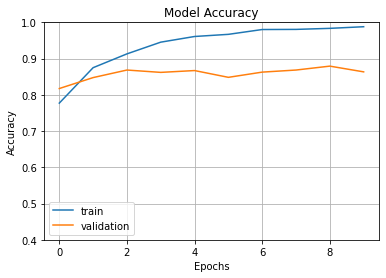

In [29]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

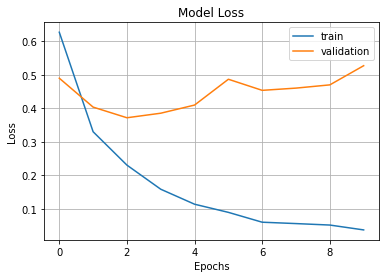

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

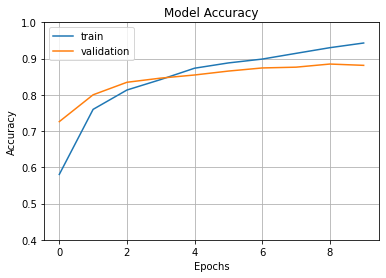

In [30]:
fig2 = plt.gcf()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

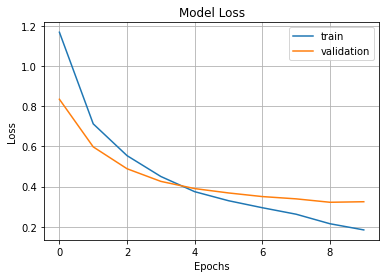

In [33]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [31]:
class_names = train_ds.class_names
print(class_names)

['glass', 'metal', 'organic', 'paper', 'plastic']


In [59]:
efficientnet_model = Sequential()

pretrained_model3 = tf.keras.applications.EfficientNetV2B0(include_top=False,
                                                      input_shape=(
                                                          256, 256, 3),
                                                      pooling='avg', classes=7,
                                                      weights='imagenet')
for layer in pretrained_model3.layers:
    layer.trainable = False

efficientnet_model.add(pretrained_model3)
efficientnet_model.add(Flatten())
efficientnet_model.add(Dense(1024, activation='relu'))
efficientnet_model.add(Dense(7, activation='softmax'))


In [60]:
efficientnet_model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b0 (Function  (None, 1280)             5919312   
 al)                                                             
                                                                 
 flatten_11 (Flatten)        (None, 1280)              0         
                                                                 
 dense_22 (Dense)            (None, 1024)              1311744   
                                                                 
 dense_23 (Dense)            (None, 7)                 7175      
                                                                 
Total params: 7,238,231
Trainable params: 1,318,919
Non-trainable params: 5,919,312
_________________________________________________________________


In [61]:
efficientnet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [62]:
epochs = 10
history2 = efficientnet_model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs
)


Epoch 1/10
233/233 [==============================] - 54s 186ms/step - loss: 0.3985 - accuracy: 0.8610 - val_loss: 0.2876 - val_accuracy: 0.8901
Epoch 2/10
233/233 [==============================] - 43s 178ms/step - loss: 0.1922 - accuracy: 0.9288 - val_loss: 0.2714 - val_accuracy: 0.8971
Epoch 3/10
233/233 [==============================] - 44s 185ms/step - loss: 0.1285 - accuracy: 0.9522 - val_loss: 0.2708 - val_accuracy: 0.9025
Epoch 4/10
233/233 [==============================] - 45s 188ms/step - loss: 0.0904 - accuracy: 0.9676 - val_loss: 0.3095 - val_accuracy: 0.9025
Epoch 5/10
233/233 [==============================] - 45s 186ms/step - loss: 0.0695 - accuracy: 0.9752 - val_loss: 0.2748 - val_accuracy: 0.9106
Epoch 6/10
233/233 [==============================] - 44s 183ms/step - loss: 0.0569 - accuracy: 0.9794 - val_loss: 0.3120 - val_accuracy: 0.9068
Epoch 7/10
233/233 [==============================] - 53s 224ms/step - loss: 0.0482 - accuracy: 0.9830 - val_loss: 0.2922 - val_ac

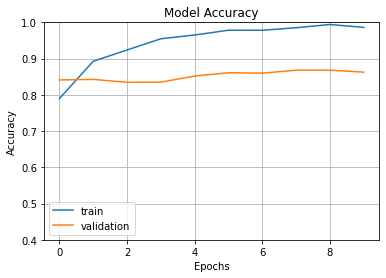

In [63]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


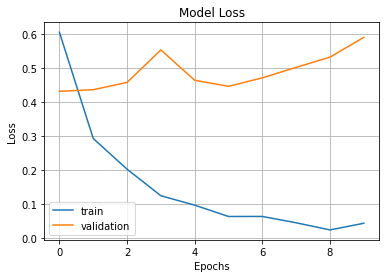

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


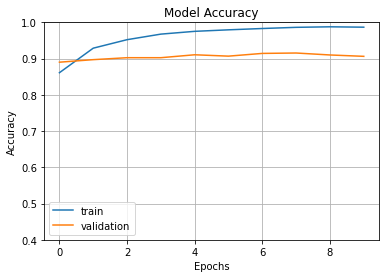

In [65]:
fig2 = plt.gcf()
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


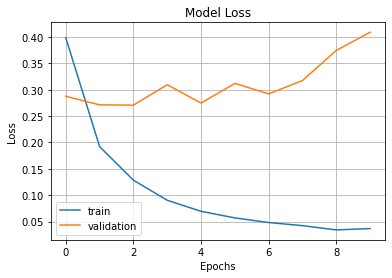

In [67]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()



In [75]:
import tensorflow_datasets as tfds
tfds.as_numpy(validation_ds)


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>